# Python for Data Science
## Lab 2:
### Nguyen Xuan Viet Duc - 22280012

#### I. Probability & Statistics questions:

#### II. Data & Coding:

In [1]:
import pandas as pd

df = pd.read_csv('transaction_data.csv')
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


#### 1. Clean data and filter Outliers
- First, remove the duplicate rows in the dataset

In [3]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536572 entries, 0 to 1081501
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  536572 non-null  int64  
 1   TransactionId           536572 non-null  int64  
 2   TransactionTime         536572 non-null  object 
 3   ItemCode                536572 non-null  int64  
 4   ItemDescription         535118 non-null  object 
 5   NumberOfItemsPurchased  536572 non-null  int64  
 6   CostPerItem             536572 non-null  float64
 7   Country                 536572 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 36.8+ MB


- After removing duplicate data, the dataset is reduced to half of its original size

In [4]:
count_missing_userId = (df["UserId"] == -1).sum()
count_missing_userId

135003

- The UserId column has a large number of  missing values that have been filled with -1, accounting for aproximately 25% of the dataset after removing duplicates
- Since UserId is an identifier and is typically not influenced by other features, treating or filling the missing values is not very feasible. In this case, I will separate the rows with missing values into a new dataset. This new dataset will be used for machine learning models that do not require the UserId feature to avoid wasting resources.

In [5]:
# Create a new data frame to store the rows with missing UserId
df_missing_userId = df[df["UserId"] == -1]
# df1 stores the remaining dataset
df1 = df[df["UserId"] != -1]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401569 entries, 0 to 1081376
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  401569 non-null  int64  
 1   TransactionId           401569 non-null  int64  
 2   TransactionTime         401569 non-null  object 
 3   ItemCode                401569 non-null  int64  
 4   ItemDescription         401569 non-null  object 
 5   NumberOfItemsPurchased  401569 non-null  int64  
 6   CostPerItem             401569 non-null  float64
 7   Country                 401569 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 27.6+ MB


- Set the format for the TransactionTime column for easier retrieval

In [7]:
from datetime import datetime

df1['TransactionTime'] = df1['TransactionTime'].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S IST %Y"))
# Formatting the date to desired format
df1['TransactionTime'] = df1['TransactionTime'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
df1

/tmp/ipykernel_4059/3730984959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TransactionTime'] = df1['TransactionTime'].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S IST %Y"))
/tmp/ipykernel_4059/3730984959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TransactionTime'] = df1['TransactionTime'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


- Upon review, I found a few rows of data referring to the year 2028. I have decided to delete them because they are not valid.

In [8]:
df1['TransactionTime'] = pd.to_datetime(df['TransactionTime'])
df1 = df1[df1['TransactionTime'].dt.year != 2028]

/tmp/ipykernel_4059/2175604583.py:1: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df1['TransactionTime'] = pd.to_datetime(df['TransactionTime'])
/tmp/ipykernel_4059/2175604583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TransactionTime'] = pd.to_datetime(df['TransactionTime'])


In [9]:
count1 = (df1["NumberOfItemsPurchased"] <= 0).sum()
count2 = (df1["CostPerItem"] <= 0).sum()
print(count1, count2)

8848 40


- The data regarding the quantity of products and the price of each product must be positive integers. Therefor, any numbers less than or equal to 0 will be removed from the dataset to maintain data integrity.

In [10]:
df1 = df1[df1["NumberOfItemsPurchased"] > 0]
df1 = df1[df1["CostPerItem"] > 0]
df1

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1080031,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
1080203,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
1081224,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
1081271,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


- Finally, remove the outliers in the numerical columns NumberOfItemsPurchased and CostPerItem

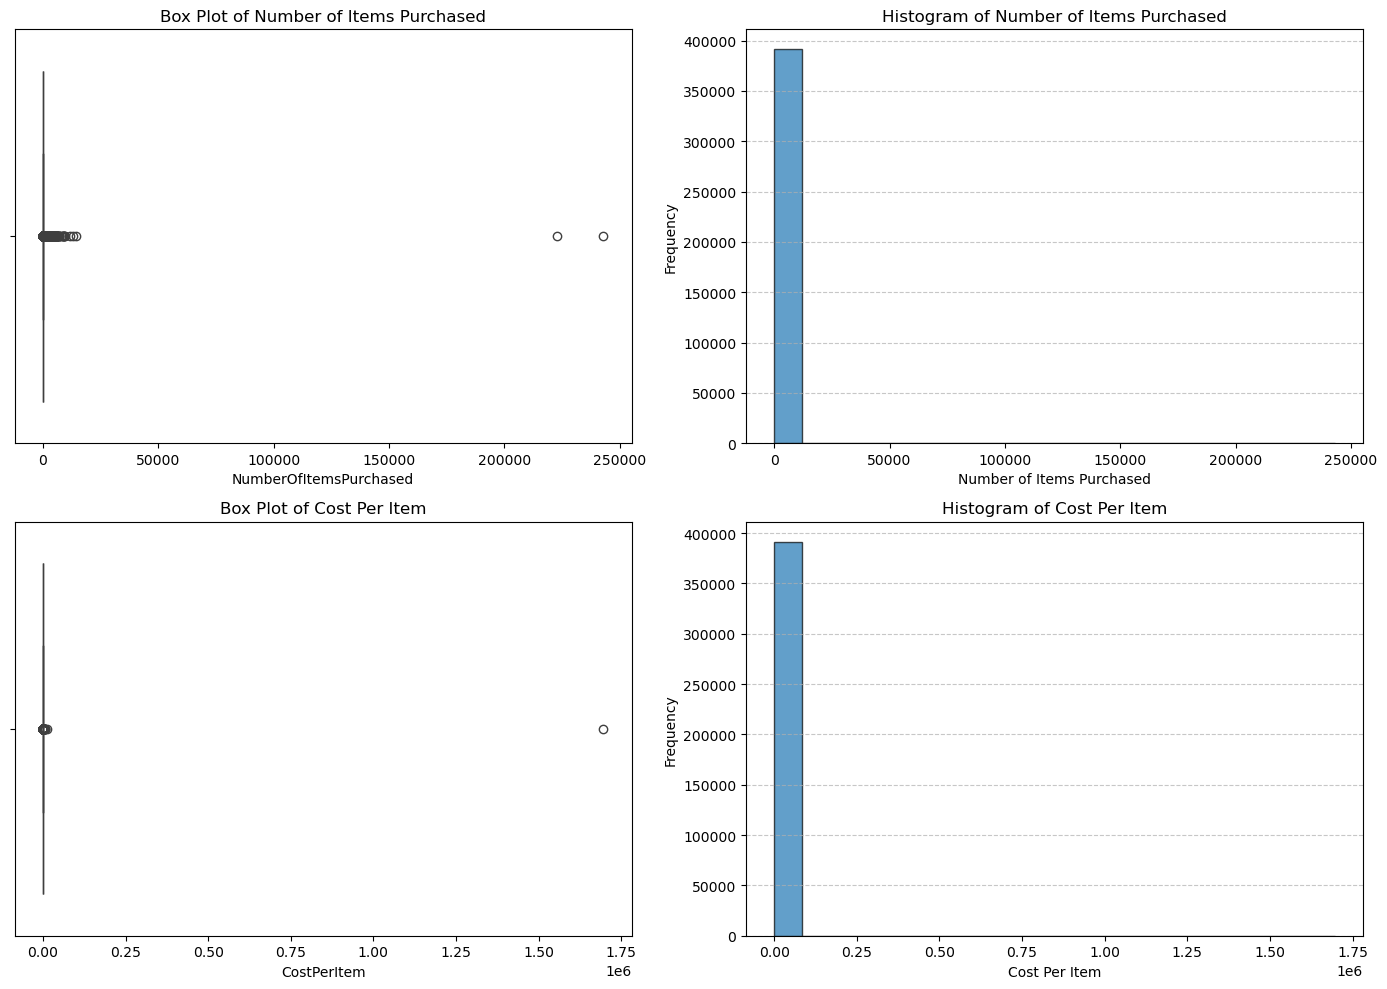

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Box plot for NumberOfItemsPurchased (top-left)
sns.boxplot(data=df1, x='NumberOfItemsPurchased', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Number of Items Purchased')

# Histogram for NumberOfItemsPurchased (top-right)
axes[0, 1].hist(df1['NumberOfItemsPurchased'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogram of Number of Items Purchased')
axes[0, 1].set_xlabel('Number of Items Purchased')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for CostPerItem (bottom-left)
sns.boxplot(data=df1, x='CostPerItem', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Cost Per Item')

# Histogram for CostPerItem (bottom-right)
axes[1, 1].hist(df1['CostPerItem'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Histogram of Cost Per Item')
axes[1, 1].set_xlabel('Cost Per Item')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- Both features show extremely skewed distributions with the bulk of the data near zero and a few extreme outliers.
- These outliers are dramatically affecting the scale of the graphs, making it difficult to see the distribution of the majority of the data.

In [12]:
import pandas as pd

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned
df_cleaned = remove_outliers_iqr(df1, 'NumberOfItemsPurchased')
df_cleaned = remove_outliers_iqr(df_cleaned, 'CostPerItem')

print("Original DataFrame shape:", df1.shape)
print("DataFrame shape after removing outliers:", df_cleaned.shape)


Original DataFrame shape: (391564, 8)
DataFrame shape after removing outliers: (332301, 8)


- Removing outliers using the Interquartile Range (IQR) technique. This technique is commonly used to identify abnormal data points based on the distribution of the data. The method uses the 25th percentile (Q1) and the 75th percentile (Q3) of the data to calculate the IQR, which is the difference between Q3 and Q1. Outliers are then typically identified based on the IQR by determining values outside the lower bound (lower_bound = Q1 - 1.5 * IQR) and the upper bound (upper_bound = Q3 + 1.5 * IQR). Outliers identified using this method are then removed from the dataset.
- After removing the outliers, the dataset contains approxiamtely 332k rows

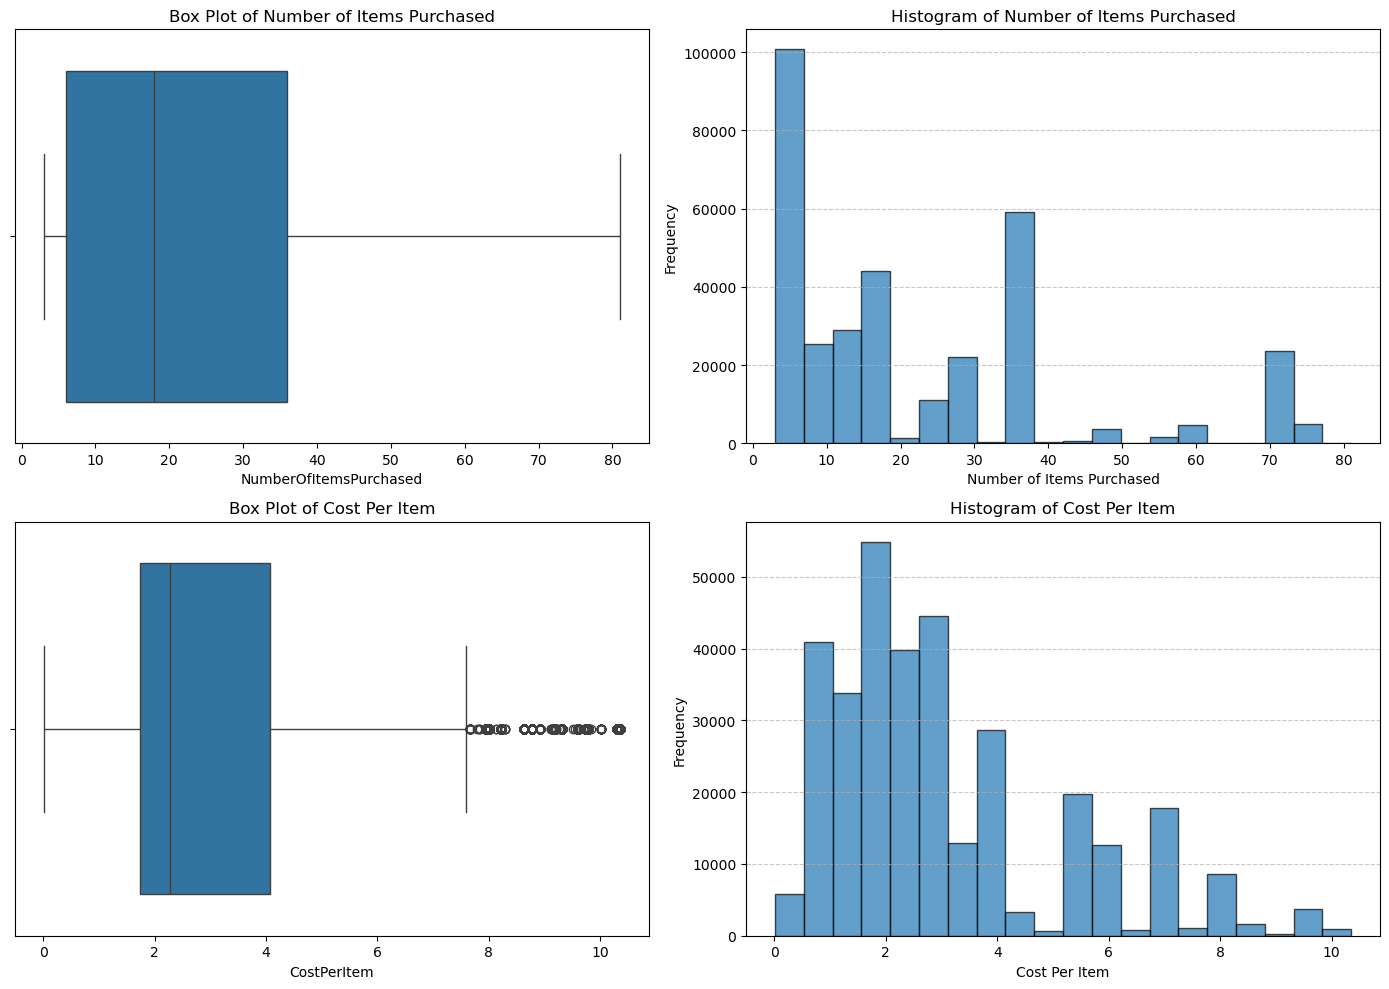

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot for NumberOfItemsPurchased (top-left)
sns.boxplot(data=df_cleaned, x='NumberOfItemsPurchased', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Number of Items Purchased')

# Histogram for NumberOfItemsPurchased (top-right)
axes[0, 1].hist(df_cleaned['NumberOfItemsPurchased'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogram of Number of Items Purchased')
axes[0, 1].set_xlabel('Number of Items Purchased')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for CostPerItem (bottom-left)
sns.boxplot(data=df_cleaned, x='CostPerItem', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Cost Per Item')

# Histogram for CostPerItem (bottom-right)
axes[1, 1].hist(df_cleaned['CostPerItem'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Histogram of Cost Per Item')
axes[1, 1].set_xlabel('Cost Per Item')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Overall observations after removing outliers:
- The data is much more interpretable and shows clear patterns.
- For Number of Items Purchased, there's a bimodal distribution, suggesting two common purchasing behaviors: small purchases (1-10 items) and medium purchases (around 35-40 items).
- The Cost Per Item shows a more normal distribution, indicating that most items fall within a predictable price range.
- Both features still show some right-skew, which is common in retail data.
- The removal of outliers has allowed for a more detailed view of the majority of the data, making it easier to understand typical customer behavior and pricing patterns.

#### 2. Calculate the number of Items purchased and prices in each month

In [14]:
df_tmp = df_cleaned.copy()

# Extract year and month
df_tmp['Year'] = df_tmp['TransactionTime'].dt.year
df_tmp['Month'] = df_tmp['TransactionTime'].dt.month

monthly_revenue = df_tmp.groupby(['Year', 'Month']).agg(TotalItemSold=('NumberOfItemsPurchased', 'sum'), 
                                                        TotalRevenue=('CostPerItem', lambda x: (x * df.loc[x.index, 'NumberOfItemsPurchased']).sum())).reset_index()
monthly_revenue

,Year,Month,TotalItemSold,TotalRevenue
0,2018,2,385533,1007342.04
1,2018,3,255372,602398.77
2,2018,4,391812,964301.67
3,2018,5,463221,1087812.84
4,2018,6,530229,1202234.91
5,2018,7,520176,1251802.08
6,2018,8,509601,1205778.42
7,2018,9,491136,1126232.91
8,2018,10,599715,1323906.75
9,2018,11,615786,1445053.11


#### 3. Report about the efficiency of selling in each time frame

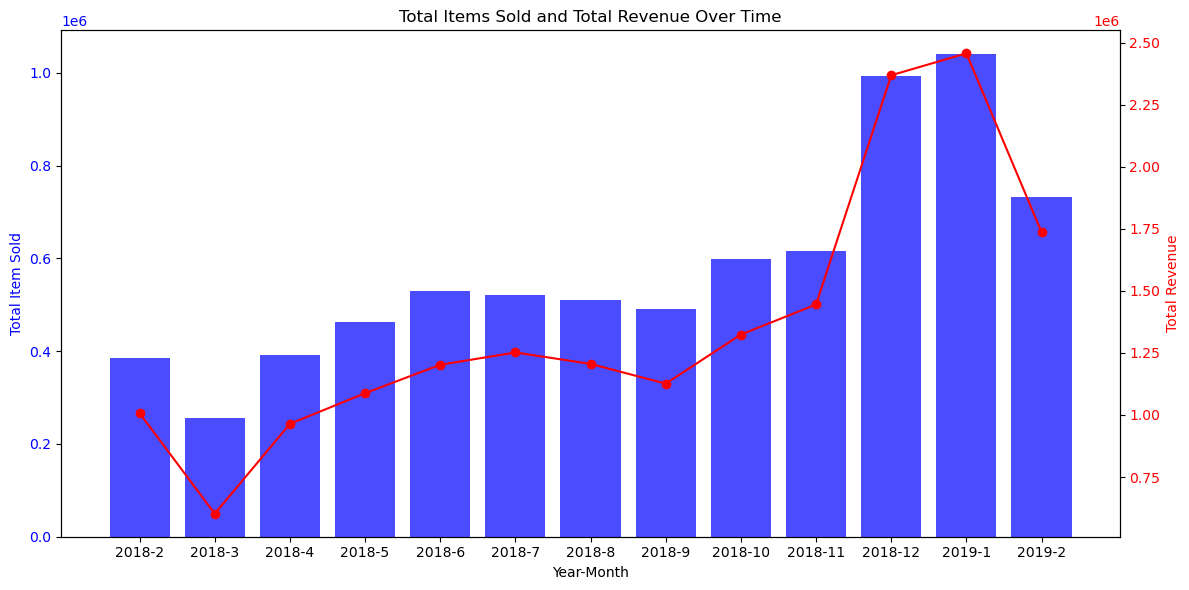

In [15]:
# Create a combined 'Year-Month' column for easier plotting
monthly_revenue['YearMonth'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for TotalItemSold (blue bars)
ax1.bar(monthly_revenue['YearMonth'], monthly_revenue['TotalItemSold'], color='blue', alpha=0.7, label='Total Item Sold')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Item Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for TotalRevenue (red line)
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(monthly_revenue['YearMonth'], monthly_revenue['TotalRevenue'], color='red', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.title('Total Items Sold and Total Revenue Over Time')
plt.tight_layout()
plt.show()

Based on the graph showing Total Items Sold and Total Revenue Over Time, a report on the efficiency of selling in each time frame:

1. Overall Trend:
There's a general upward trend in both total items sold and total revenue from 2018-2 to 2019-1, with a slight decline in 2019-2. It can be observed that the shopping cycle throughout the year is low in the early months and increases significantly toward the end of the year.

2. Time Frame Analysis:

    2018-2 to 2018-3: Low efficiency period
    - Decrease in both items sold and revenue
    - Possible seasonal slump or operational issues

    2018-4 to 2018-7: Steady growth period
    - Gradual increase in items sold and revenue
    - Improving efficiency, possibly due to marketing efforts or expanded product range

    2018-8 to 2018-9: Slight stagnation
    - Items sold and revenue remain relatively stable
    - Efficiency plateaued, might indicate market saturation or competition

    2018-10 to 2019-1: High growth period
    - Significant increase in both items sold and revenue
    - Peak efficiency, possibly due to holiday season sales (November-January)

    2019-1: shows the highest revenue despite slightly fewer items sold than 2018-12, indicating higher profit margins or sales of higher-value items

    2019-2: Decline from peak
    - Decrease in both items sold and revenue
    - Still higher than pre-holiday levels, suggesting some retention of growth

3. Efficiency Highlights:
    - Most efficient month: 2019-1 (highest revenue relative to items sold)
    - Least efficient month: 2018-3 (lowest revenue and items sold)
    - Best growth period: 2018-10 to 2019-1

4. Recommendations:
    - Investigate factors behind the 2018-10 to 2019-1 success for replication
    - Address the causes of the 2018-2 to 2018-3 slump to prevent future dips
    - Develop strategies to maintain post-holiday momentum and minimize the drop-off seen in 2019-2

#### 4. Calculate the number of items purchased for each userID in 30 days for each day

In [16]:
df_tmp1 = df_cleaned.copy()

# Sort the dataframe by UserId and TransactionTime
df_tmp1 = df_tmp1.sort_values(['UserId', 'TransactionTime'])

# Function to calculate cumulative sum within 30 days
def cumulative_sum_30days(group):
    cum_sum = 0
    result = []
    for i, row in enumerate(group.itertuples()):
        if i == 0 or (row.TransactionTime - group.iloc[i-1].TransactionTime).days > 30:
            cum_sum = row.NumberOfItemsPurchased
        else:
            cum_sum += row.NumberOfItemsPurchased
        result.append(cum_sum)
    return result

# Apply the function to each group
df_tmp1['NumberOfItemsPurchased_30days'] = df_tmp1.groupby('UserId').apply(cumulative_sum_30days).explode().values


/tmp/ipykernel_4059/3771624598.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_tmp1['NumberOfItemsPurchased_30days'] = df_tmp1.groupby('UserId').apply(cumulative_sum_30days).explode().values


In [17]:
df_tmp1

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,NumberOfItemsPurchased_30days
25862,259287,5964607,2018-04-09 10:30:00,472437,SET OF 2 TINS VINTAGE BATHROOM,12,5.87,Iceland,12
75005,259287,5964607,2018-04-09 10:30:00,1777125,BLUE NEW BAROQUE CANDLESTICK CANDLE,72,1.18,Iceland,84
94492,259287,5964607,2018-04-09 10:30:00,477267,ALARM CLOCK BAKELIKE RED,12,5.18,Iceland,96
95589,259287,5964607,2018-04-09 10:30:00,466116,SMALL HEART MEASURING SPOONS,36,1.18,Iceland,132
97199,259287,5964607,2018-04-09 10:30:00,461496,PACK OF 60 MUSHROOM CAKE CASES,72,0.76,Iceland,204
...,...,...,...,...,...,...,...,...,...
656237,384027,6277865,2018-12-24 06:23:00,480186,HAND WARMER SCOTTY DOG DESIGN,36,2.90,United Kingdom,1314
676881,384027,6277865,2018-12-24 06:23:00,470841,LIPSTICK PEN FUSCHIA,36,0.58,United Kingdom,1350
859489,384027,6277865,2018-12-24 06:23:00,492345,ICE CREAM BUBBLES,60,1.15,United Kingdom,1410
934728,384027,6277865,2018-12-24 06:23:00,451101,FAWN BLUE HOT WATER BOTTLE,12,5.18,United Kingdom,1422
